# 1. load the data

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
seed = 950

def load_data(filename):
    data = pd.read_csv(filename)
    X = data.iloc[:, 2:]
    y = data.iloc[:, 1]
    return X, y


X, y = load_data('../output.csv')
# load_data('../Feature Selection/output_after_feature_selection.csv')

In [120]:
X

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41.0,0,0,0,1,3,3,1,1,2,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,39.0,1,1,0,0,3,3,1,1,2,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,31.0,0,0,0,1,2,1,1,0,2,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,35.0,0,0,0,1,3,3,1,1,3,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,61.0,1,0,0,0,2,1,1,0,2,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,58.5,1,0,1,0,3,2,1,1,4,...,0.476493,0.476493,2.453583,0.003229,2.327038e+06,18.562377,0.013766,0.018042,0.000288,0.012257
396,34.3,0,0,0,1,3,3,1,0,2,...,0.418382,0.418382,2.995603,0.004243,1.005061e+06,156.627179,0.002228,0.136015,0.022148,0.002098
397,53.3,0,0,0,1,2,1,1,0,2,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
398,68.8,1,0,0,0,3,3,1,1,3,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368


In [121]:
y

0      144.000000
1      142.000000
2      135.000000
3       12.000000
4      109.000000
          ...    
395     54.500000
396     49.250000
397     48.500000
398     47.500000
399     46.916667
Name: RelapseFreeSurvival (outcome), Length: 400, dtype: float64

In [122]:
def feature_selection(X, y, count):
    # Train a Random Forest model
    model = RandomForestRegressor(random_state=seed)
    model.fit(X, y)

    # Get feature importance
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    print(feature_importance)

    # Select features with importance above a threshold
    selected_features = feature_importance[:count]["Feature"]
    print("Selected Features:\n", selected_features)
    X = X[selected_features]
    return X


X = feature_selection(X, y, 30)

                                  Feature  Importance
36              original_firstorder_Range    0.051612
30           original_firstorder_Kurtosis    0.036706
0                                     Age    0.033519
105  original_glszm_SizeZoneNonUniformity    0.032692
26       original_firstorder_90Percentile    0.029706
..                                    ...         ...
52                       original_glcm_Id    0.000991
66               original_glcm_SumSquares    0.000935
65               original_glcm_SumEntropy    0.000786
63       original_glcm_MaximumProbability    0.000697
58          original_glcm_InverseVariance    0.000629

[118 rows x 2 columns]
Selected Features:
 36                             original_firstorder_Range
30                          original_firstorder_Kurtosis
0                                                    Age
105                 original_glszm_SizeZoneNonUniformity
26                      original_firstorder_90Percentile
110                    

In [123]:
X

,original_firstorder_Range,original_firstorder_Kurtosis,Age,original_glszm_SizeZoneNonUniformity,original_firstorder_90Percentile,original_glszm_ZoneEntropy,original_shape_Elongation,original_firstorder_Skewness,original_firstorder_Variance,original_firstorder_RobustMeanAbsoluteDeviation,...,original_firstorder_MeanAbsoluteDeviation,original_shape_Maximum2DDiameterRow,original_glrlm_RunLengthNonUniformity,original_glrlm_RunEntropy,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_shape_Sphericity,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_glcm_Imc2
0,3.366632,4.594629,41.0,5.969697,0.708860,3.325332,0.813912,0.386237,0.141574,0.174026,...,0.278008,38.626416,677.118614,3.865811,0.004033,0.771675,0.011679,137.835476,0.005563,0.425720
1,4.964442,3.884960,39.0,15.850000,2.322627,3.032144,0.666118,-0.634246,0.441115,0.318599,...,0.499454,41.761226,159.837285,4.255471,0.005064,0.603481,0.012337,438.113168,0.006518,0.105206
2,4.867321,4.760064,31.0,20.405405,1.961740,2.485848,0.645083,0.545105,0.316651,0.231278,...,0.400199,40.447497,114.255050,4.232295,0.005672,0.608183,0.013216,402.737100,0.007181,0.086544
3,3.881506,3.421056,35.0,25.554455,2.164869,2.606255,0.770842,-0.792678,0.306963,0.309734,...,0.442713,44.944410,212.625994,4.412648,0.003424,0.474509,0.010811,501.648278,0.004902,0.065831
4,3.181566,3.107181,61.0,12.551724,1.832410,2.809279,0.861035,-0.732889,0.301317,0.324996,...,0.447799,30.594117,101.119011,4.140589,0.005788,0.756228,0.012956,442.211336,0.007222,0.106835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,3.930941,3.692904,58.5,6.384615,2.115318,2.453583,0.389439,-0.924885,0.311048,0.289602,...,0.434932,23.323808,98.508566,4.041730,0.003027,0.574024,0.011136,309.725322,0.004649,0.123506
396,5.459491,2.450481,34.3,5.357143,2.442335,2.995603,0.915643,-0.193503,1.192819,0.667850,...,0.901711,29.681644,265.727223,3.873227,0.005833,0.601545,0.013711,117.773899,0.007409,0.527680
397,3.990703,2.056989,53.3,1.500000,2.978465,1.500000,0.657236,0.168137,0.789961,0.585934,...,0.753829,16.643317,34.097927,3.175681,0.002918,0.670158,0.014066,111.248195,0.005147,0.031234
398,4.884933,3.778624,68.8,3.533333,1.982108,3.573557,0.890276,-0.972603,0.505348,0.369673,...,0.554049,43.657760,206.812200,4.786990,0.001355,0.758747,0.007976,464.599788,0.002679,0.489769


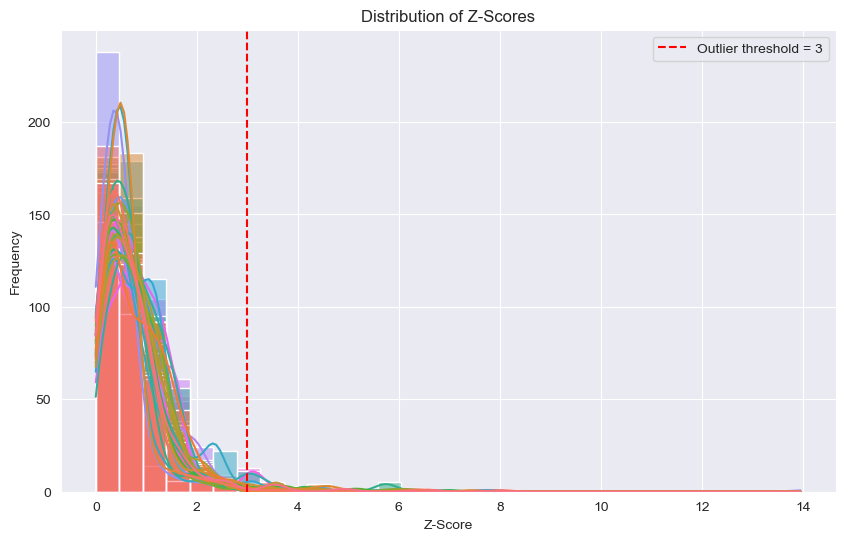

Removed 58 outliers from the data.
(342, 30) (342,)


In [124]:
def zscoree(X, y_reg):
    # 假设 X 是特征，y_reg 是目标变量

    # 计算 Z-Score
    z_scores = zscore(X)

    # 计算所有特征的 Z-Score的绝对值
    z_scores_flat = np.abs(z_scores)

    # 绘制 Z-Score 分布图
    plt.figure(figsize=(10, 6))
    sns.histplot(z_scores_flat, bins=30, kde=True)
    plt.title("Distribution of Z-Scores")
    plt.xlabel("Z-Score")
    plt.ylabel("Frequency")
    plt.axvline(x=3, color='r', linestyle='--', label="Outlier threshold = 3")
    plt.legend()
    plt.show()

    # 设置 Z-Score 阈值
    threshold = 3

    # 找到所有 Z-Score 超过阈值的样本（每个特征的 Z-Score 超过阈值的样本）
    outliers = (np.abs(z_scores) > threshold).any(axis=1)  # 检查任意一个特征的 Z-Score 是否超出阈值

    # 删除异常值
    X = X[~outliers]
    y_reg = y_reg[~outliers]

    # 输出去除的异常值个数
    print(f"Removed {np.sum(outliers)} outliers from the data.")
    print(X.shape, y_reg.shape)
    return X, y_reg


X, y = zscoree(X, y)

In [125]:
def split_data_into_test_and_train(X, y):
    np.random.seed(42)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = split_data_into_test_and_train(X, y)

# 2. Linear Reg

In [126]:
def linear_reg(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2):", r2)

    print("Model Coefficients:", model.coef_)
    print("Model Intercept:", model.intercept_)

    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error (MAE):", mae)
    return model


model = linear_reg(X_train, X_test, y_train, y_test)

Mean Squared Error (MSE): 700.3109646134764
R-squared (R2): -0.355176946133009
Model Coefficients: [-5.17252574e+00  1.43056151e+01 -3.66378798e-02  2.03381315e+00
  1.40222341e+01  3.97961705e+00 -6.70212962e+01  6.35077645e+00
  2.63547910e+01 -3.10066752e+02 -2.70083372e-01 -1.29450607e+00
  1.27303447e+02  8.25483978e+00  6.93852782e+01  1.33162447e+00
  9.59202896e+01 -3.76149846e-01 -1.54252031e+00  6.86826285e+02
 -9.32960995e+01 -3.72961787e-01  1.37368154e-02  1.53679430e+01
 -5.40130563e+09  4.98189004e+01 -1.35033479e+09 -3.14720608e-02
  6.75164064e+09 -3.29366705e+01]
Model Intercept: -28.208495013296513
Mean Absolute Error (MAE): 20.424974322518157


In [127]:
# import matplotlib.pyplot as plt
#
# # Ensure X is in DataFrame format for column access (if not already)
# X_test = pd.DataFrame(X_test, columns=X.columns)
#
# # Generate predictions for the full range of X values for visualization
# X_full_range = pd.concat([X_train, X_test])  # Combine training and testing data
# y_full_pred = model.predict(X_full_range)
#
# # Visualization: Plot for each feature
# for feature in X.columns:
#     plt.figure(figsize=(8, 6))
#
#     # Scatter plot of actual data (testing points)
#     plt.scatter(X_test[feature], y_test, color='blue', label='Actual Data (Test)', alpha=0.6)
#
#     # Line plot of predictions (model's regression line)
#     sorted_indices = X_full_range[feature].argsort()
#     plt.plot(
#         X_full_range[feature].iloc[sorted_indices],
#         y_full_pred[sorted_indices],
#         color='red',
#         label='Prediction Line',
#         linewidth=2
#     )
#
#     # Formatting the plot
#     plt.title(f"Regression Model vs Data for {feature}")
#     plt.xlabel(feature)
#     plt.ylabel("Target (y)")
#     plt.legend()
#     plt.grid()
#     plt.show()

# 3. SVM

## 3.1 rbf kernal

In [128]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

model_rbf = SVR(kernel='rbf', C=10.0, epsilon=0.01, gamma=0.01)
model_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = model_rbf.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_rbf)
r2 = r2_score(y_test, y_pred_rbf)
mae = mean_absolute_error(y_test, y_pred_rbf)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print('Mean Absolute Error (MAE):', mae)

Mean Squared Error: 628.1868907841771
R-squared: -0.21560911547851136
Mean Absolute Error (MAE): 18.300522481227233


## 3.2 linear kernel

In [129]:
model_linear = SVR(kernel='linear', C=10.0, epsilon=0.1, gamma='scale')
model_linear.fit(X_train_scaled, y_train)

y_pred_linear = model_linear.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)
mae = mean_absolute_error(y_test, y_pred_linear)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print('Mean Absolute Error (MAE):', mae)

Mean Squared Error: 692.0773938389273
R-squared: -0.33924410220819357
Mean Absolute Error (MAE): 20.261181766827576


## 3.3 Polynomial kernel

In [130]:
model_poly = SVR(kernel='poly', C=10.0, epsilon=0.1, gamma='scale')
model_poly.fit(X_train_scaled, y_train)

y_pred_poly = model_poly.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)
mae = mean_absolute_error(y_test, y_pred_poly)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print('Mean Absolute Error (MAE):', mae)

Mean Squared Error: 621.2465943955815
R-squared: -0.20217889641811748
Mean Absolute Error (MAE): 19.000473379150048


## 3.4 Sigmoid kernel

In [131]:
model_sigmoid = SVR(kernel='sigmoid', C=10.0, epsilon=0.1, gamma='scale')
model_sigmoid.fit(X_train_scaled, y_train)

y_pred_sigmoid = model_sigmoid.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_sigmoid)
r2 = r2_score(y_test, y_pred_sigmoid)
mae = mean_absolute_error(y_test, y_pred_sigmoid)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print('Mean Absolute Error (MAE):', mae)

Mean Squared Error: 664.3277846870109
R-squared: -0.28554562754896207
Mean Absolute Error (MAE): 19.70411256308119


## 3.5 Trying to tune the hyperparameter

In [132]:
# Feature scaling
def my_SVM(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the parameter grid
    param_grid = {
        'kernel': ['linear', 'rbf', 'poly'],  # Kernels to try
        'C': [0.1, 1, 10, 100],  # Regularization parameter
        'epsilon': [0.01, 0.1, 0.5, 1],  # Epsilon in the epsilon-SVR model
        'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # Kernel coefficient (for 'rbf', 'poly', 'sigmoid')
    }

    # Grid search
    grid_search = GridSearchCV(
        SVR(),
        param_grid,
        cv=5,  # 5-fold cross-validation
        scoring='r2',  # Optimize for R-squared
        verbose=1,  # Show progress
        n_jobs=-1  # Use all available processors
    )
    grid_search.fit(X_train_scaled, y_train)

    # Best hyperparameters and their performance
    best_model = grid_search.best_estimator_
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation R2 Score:", grid_search.best_score_)

    # Evaluate on the test set
    y_pred = best_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print("Test Mean Squared Error (MSE):", mse)
    print("Test R-squared (R2):", r2)
    print('Test Mean Absolute Error (MAE):', mae)


my_SVM(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'C': 10, 'epsilon': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation R2 Score: -0.014824315114729791
Test Mean Squared Error (MSE): 625.0197281596687
Test R-squared (R2): -0.20948031557351965
Test Mean Absolute Error (MAE): 18.28472102544153


# Random Forest

In [133]:
def my_rf(X_train, X_test, y_train, y_test):
    # Initialize the Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=seed)

    # Train the model on the training data
    rf.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")


my_rf(X_train, X_test, y_train, y_test)

Mean Squared Error: 575.65
R-squared: -0.11
Mean Absolute Error: 18.80


# MLP

In [134]:
def my_mlp_with_tuning(X_train, X_test, y_train, y_test):
    # Define the MLPRegressor model
    model_mlp = MLPRegressor(random_state=42)

    # Define the hyperparameter grid
    param_grid = {
        'hidden_layer_sizes': [(64,), (128, 64), (128, 64, 32)],
        'activation': ['relu', 'logistic', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'max_iter': [1000, 2000]
    }

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=model_mlp, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best model and its parameters
    best_model = grid_search.best_estimator_
    print("Best Hyperparameters:", grid_search.best_params_)

    # Predict on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MLPRegressor Mean Squared Error: {mse}")
    print(f"MLPRegressor R^2 Score: {r2}")
    print(f"MLPRegressor MAE: {mae}")

    return mse, r2, mae, grid_search.best_params_

my_mlp_with_tuning(X_train, X_test, y_train, y_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encount

Best Hyperparameters: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (128, 64), 'max_iter': 2000, 'solver': 'adam'}
MLPRegressor Mean Squared Error: 595.8488399381151
MLPRegressor R^2 Score: -0.1530315132362734
MLPRegressor MAE: 18.354674586485732


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


(595.8488399381151,
 -0.1530315132362734,
 18.354674586485732,
 {'activation': 'logistic',
  'alpha': 0.01,
  'hidden_layer_sizes': (128, 64),
  'max_iter': 2000,
  'solver': 'adam'})

# CNN

# trying different feature selected
different feature selected, and see the mse and r2